## Predict Whether a Pateint has Heart Disease or not.

In [21]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [22]:
# Load Dataset
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Exploratory Data Analysis (EDA)

In [23]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
# Summary Statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


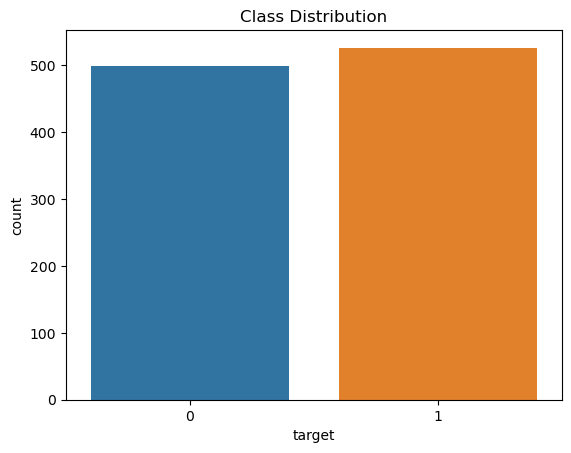

In [25]:
# Check class distribution
sns.countplot(x=df['target'])
plt.title("Class Distribution")
plt.show()

## Feature Selection and Preprocessing

In [26]:
# Define independent variables (X) and target variable (y)
X = df.drop("target", axis=1)
y = df["target"]

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train Logistic Regression Model

In [27]:
# Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Predict on Test data
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]


## Model Evaluation

In [29]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

Accuracy : 0.80


In [30]:
# Classification Report
print("\n Classification Report : \n", classification_report(y_test, y_pred))


 Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



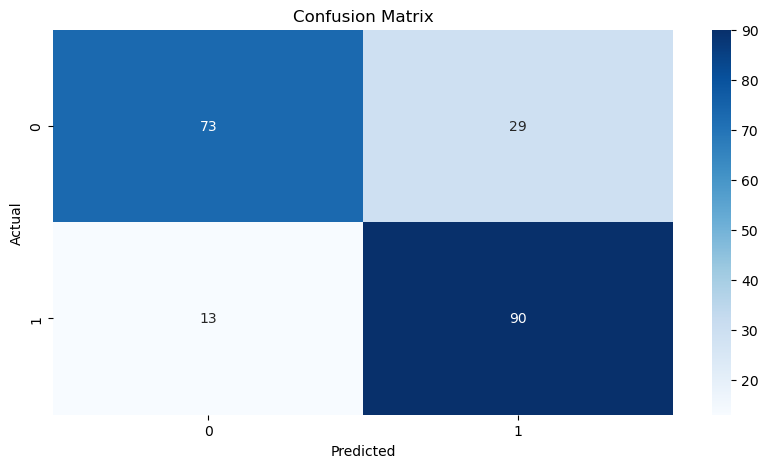

In [31]:
# Confusion Matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()